# SCI1022 Python Assignment 1: numerical approximation of $\Pi$

Instructions:

* Complete the tasks in this Jupyter notebook. 

* <span style="color:red">**Tasks**</span> are marked in <span style="color:red">**red**</span> and displayed in indented blocks. **There are two types of tasks**:
  1. Code tasks, which are solved by writing code on the blank code cells provided.
  2. Short written answer tasks, which are solved by writing your own answers in the text cells marked with the content "<span style="color:red">**Write your answers to Task X in this cell.**</span>".
  
* 
When you finish all tasks, **upload this Jupyter notebook in Moodle with the tasks solved**. Before submitting, **we highly encourage that you restart the Jupyter Kernel, and then execute all code cells in the search of unnoticed errors.** In order to restart  the Jupyter kernel and run all cells in sequence afterwards you can use the `Kernel->Restart & Run All` option in the menu at the top of the browser page.

---


In this assignment, you have to develop Python code being able to compute numerical approximations of $\Pi$. 

$\Pi$ is an **irrational number**. A number is irrational if and only if *its decimal representation has infinite digits, and never settles into a periodic pattern.*

Mathematicians and computer scientists are nowadays able to compute many trillions of digits of $\Pi$ using advanced computational approaches, and the vast amount of computing resources available at supercomputers.  

However, in this assignment the objective is fairly more modest, we only aim at computing a few decimal digits of $\Pi$. We will use Python `float`s in order to store numerical approximations of $\Pi$. The following statement deserves its own paragraph:


**A Python `float` can represent at most about 16 correct decimal digits of a real number.** 

It turns out that at most about 16 correct decimal digits is enough for many real-world application problems, but  obviously not for computing trillion of digits of $\Pi$. The reasons behind this property of Python `float`s are pretty technical and out of the scope of the assignment. However, if you are curious, and willing to know more, we recommend [this excellent resource](https://docs.python.org/3/tutorial/floatingpoint.html). You might want to check this yourself by executing the following code snippet, which prints the first 100 decimal digits of $\Pi$ as represented in the computer:

In [1]:
import math
print("%0.99f" % math.pi)

3.141592653589793115997963468544185161590576171875000000000000000000000000000000000000000000000000000


and comparing the result with the 100 first decimal digits of $\Pi$ (obtained from [www.math.com](http://www.math.com/tables/constants/pi.htm)):

`3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679`.

# Leibniz infinite series

The [Leibniz formula for $\Pi$](https://en.wikipedia.org/wiki/Leibniz_formula_for_%CF%80) (a.k.a. Madhava-Leibniz series) states that:

$ \frac{\Pi}{4} = \sum_{k=0}^{\infty} \frac{(-1)^k}{2k+1}$

At the right hand side of this equivalence, we have an [infinite series](https://en.wikipedia.org/wiki/Series_(mathematics)). 

For obvious reasons, a computer cannot sum all the terms of an infinite series. However, it can sum a large (but still finite) number of these terms remarkably fast (recall that computers are extraordinary at doing repetitive things). In other words, one may obtain a computer approximation of $\Pi$ by truncating the series above, i.e., by summing a finite number of terms of the series.

Recall that when implementing an arithmetic expression that contains more than one mathematical operator (like each of the terms in the Leibniz formula) in a programming language, it is crucial that one understands the so-called "order of operations" in order to avoid programming errors. At this point, you may want to review the relevant section in the pre-class Jupyter notebook of our first session on the basics of Python.

><span style="color:red">**Task 1 (4/15 points).**</span>  Write a function `estimate_pi(n)` which approximates $\Pi$ by truncation of the Leibniz formula, i.e., by summing its first $n$ terms. We will refer to $n$ as the upper limit of the summation. Test it with $n=10$, $n=100$, and $n=1000$. You should observe that the larger the $n$ that better the approximation of $\Pi$.

><span style="color:red">**Task 2 (2/15 points).**</span> Write a function `compute_relative_error(estimated_pi)` which computes the relative error among `estimated_pi` and `math.pi`, defined as the absolute value of the quotient among the difference of `estimated_pi` and `math.pi` (numerator), and `math.pi` (denominator). Roughly speaking, the exponent of the relative error in scientific notation provides the number of correct digits we have computed of $\Pi$. For example, if the relative error is of $2.34 \times 10^{-5}$, we will say that we have computed 5 correct digits of $\Pi$. (This is not totally accurate, but we will stick into this for simplicity.) **Hint: the Python built-in `abs(x)` function returns the absolute value of x.**

><span style="color:red">**Task 3 (3/15 points).**</span> Write a function `compute_relative_errors(list_upper_limits)` that, given a list with different values of $n$, i.e., different values for the upper limit of summation of the truncated Leibniz series, returns a list with the corresponding relative errors. The function to be written in this task MUST call the ones defined in Task 1 and 2. 

><span style="color:red">**Task 4 (3/15 points).**</span> Write a function `generate_list_upper_limits(k)` that generates a list with a sequence of upper limits included in the interval $[1,10^{k}]$. In order to reduce computational demands, we will generate such a sequence as follows: 
>
> $1,2,\ldots,10,20,\ldots,100,200,\ldots,10^k$.
>
>**Hint: you can use the code in the cell below in order to develop the `generate_list_upper_limits(k)` function.**

><span style="color:red">**Task 5 (3/15 points).**</span> Use the code cells provided below in order to plot relative error as a function of summation upper limit for $k=7$. **Describe below in words in a text cell what you observe**. In particular, would you say that there is any trend (e.g., linear, quadratic, cubic, etc.) in the decay of the relative error as a function of the summation upper limit? Accordingly to your observations, can you estimate how many Leibniz series terms should you sum in order to compute a trillion of digits (i.e., one million million, $10^{12}$) of $\Pi$?

In [16]:
#Task 1
def estimate_pi(n):
    i = 0
    f = 0
    while i < n:
        f = 4*((-1)**i/(2*i+1)) + f
        i = i +1
    return f

print(f"Estimated value of pi (10):{estimate_pi(10)}")
print(f"Estimated value of pi (100):{estimate_pi(100)}")
print(f"Estimated value of pi (1000):{estimate_pi(1000)}")

import math
print(f"Actual value of pi:{math.pi}")

Estimated value of pi (10):3.0418396189294032
Estimated value of pi (100):3.1315929035585537
Estimated value of pi (1000):3.140592653839794
Actual value of pi:3.141592653589793


In [14]:
#Task 2
def compute_relative_error(estimated_pi):
    n = abs(estimated_pi-math.pi)
    rel = n/math.pi
    return rel

In [4]:
#Task 3
def compute_relative_errors(list_upper_limits):
    relerror = []
    for i in range(len(list_upper_limits)):
        est = estimate_pi(list_upper_limits[i])
        err = compute_relative_error(est)
        relerror.append(err)                              
    return relerror

In [ ]:
#Task 4

In [5]:
# Code snippet to help you out with Task 4. You should first understand what this code does. 
# Then, you may use it in order to write the body of the function required to complete Task 4.
def generate_list_upper_limits(k):
    limlist = []
    for power in range(k):
        for coefficient in range(1,11):
            current_n=coefficient * 10 ** power
            limlist.append(current_n)
    return limlist

In [6]:
# This cell and the next one are the ones that you need to answer to the question of Task 5.
upper_limits=generate_list_upper_limits(7)
print(upper_limits)
relative_errors=compute_relative_errors(upper_limits)
print(relative_errors)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]
[0.2732395447351627, 0.15117363684322474, 0.10347427210380775, 0.07841709142978685, 0.06305396909634241, 0.05269508042503607, 0.045246423016130376, 0.03963621329954713, 0.03526023050840364, 0.03175237710923643, 0.03175237710923643, 0.015905577976462196, 0.010607386305403936, 0.007956504726161022, 0.006365561421825672, 0.005304796483322961, 0.004547052143197559, 0.003978718182890221, 0.003536667370223468, 0.00318301929431018, 0.00318301929431018, 0.001591539484045989, 0.001061030006672841, 0.0007957734720706582, 0.000636619135750372, 0.0005305161085596649, 0.00045472

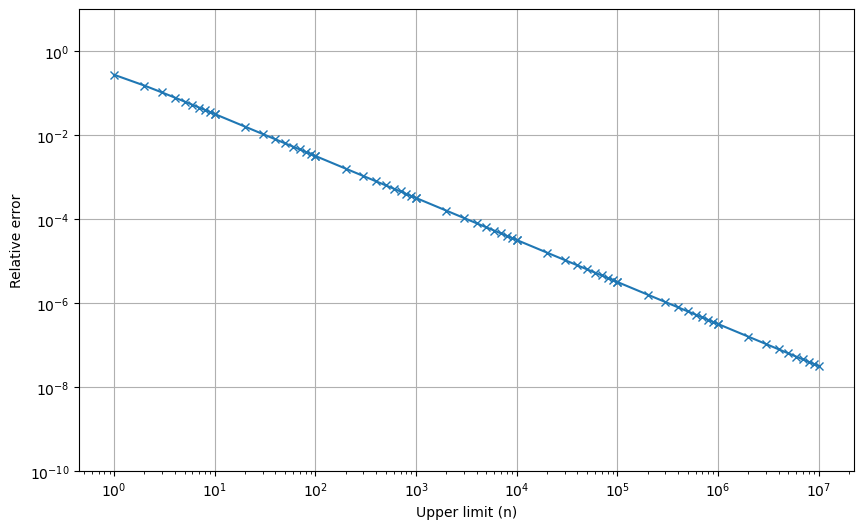

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [10, 6]
plt.xlabel('Upper limit (n)')
plt.ylabel('Relative error')
plt.grid()
plt.xscale('log')
plt.yscale('log')
axes = plt.gca()
axes.set_ylim([1.0e-10,10])
plt.plot(upper_limits,relative_errors, '-x')
plt.show()

<span style="color:red">**Write your answers to Task 5 in this cell.**</span>

It starts of slightly quadratic and is mostly linear from x > 3. This shows that there is a linear relation between the upper limit and the relative error as n increases. As the upper limit increases in size, the smaller the relative error becomes which makes it completely linear. There is slight curveture at the begginning which makes sense since at n = 1 the estimate of pi is 4. So, as n increases, so does the accuracy of the decimal places which make the graph more linear as n gets bigger. If we were to compute one trillion digits it would take a large amount of time, computing power, and far more efficient code. The upper limit is almost 1:1.1 with the relative error, so at 10E-6.6 the upper limit is about 10E6. So estimating 10E10E-12 would take roughly 10E10E12 computations. 